**Date: January 2nd, 2025.<br>
Analyst name: Michelle Tirado <br>
Proyect name: “CallMeMaybe”<br>
Project objective: Analyze agent performance metrics to identify top-performing and underperforming agents.**
<br>
<br>
**DATA DESCRIPTION**<br>
The telecom_dataset_us.csv dataset contains information about the usage of the “Call Me Maybe” virtual telephony service. The customers are organizations that need to distribute large volumes of inbound calls among multiple operators. Operators can also place internal calls to communicate with one another. All calls are routed through the Call Me Maybe network. The compressed dataset telecom_dataset_us.csv includes the following columns:
<br>
•	user_id: Unique identifier of the customer (client) account.<br>
•	date: Date on which the statistics were recorded.<br>
•	direction: Call direction, either inbound (in) or outbound (out).<br>
•	internal: Indicates whether the call was internal (between operators) or external (with a customer).<br>
•	operator_id: Unique identifier of the operator handling the call.<br>
•	is_missed_call: Indicates whether the call was missed (True) or successfully answered (False).<br>
•	calls_count: Number of calls recorded on the given date.<br>
•	call_duration: Duration of the call in seconds, excluding waiting time.<br>
•	total_call_duration: Total call duration in seconds, including waiting time.<br>
<br>
<br>
**WORKFLOW:** Data import > Data cleaning > Exploratory Data Analysis > Metric construction > Data Visualization & Presentation > Conclusions<br>
<br>
<br>

**1. DATA IMPORT**<br>
The first step is to import all required libraries and load the data from the original database. Since the data is stored in a CSV file, it is imported using pandas library functions.

In [1]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. DATA IMPORT
df= pd.read_csv('telecom_dataset_new.csv')
original_df = df
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1


In [3]:
print("Columns with empty values")
df.isna().sum().sort_values(ascending=False)

Columns with empty values


operator_id            8172
internal                117
user_id                   0
direction                 0
date                      0
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

The dataset contains 8 columns and a total of 53,902 entries. The "operator_id" and "internal" columns contain missing values, which require further investigation during the data-cleaning process. In addition, some columns have incorrect data types that need to be corrected as part of data cleaning.

**2. DATA CLEANING** <br>
This phase includes: A) Cell format correction, B) Removing empty cells, and C) Eliminating duplicates. <br>
The cell formats for "user_id", "date", and "operator_id" will be corrected. <br>
The "operator_id" and "direction" columns contains missing values. Before removing these records, the data will be explored to identify the source of the issue and to determine the most appropriate data-cleaning approach. <br>
Duplicantes will be counted and removed from the dataset. <br>

*A) Cell format correction*

In [4]:
# 2. DATA CLEANING 

# Change the cell format 
df['user_id'] = df['user_id'].astype('object')
df['date'] = pd.to_datetime(df['date'])
df['operator_id'] = pd.to_numeric(df['operator_id'], errors='coerce').astype('Int64')
df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  object                   
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  Int64                    
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: Int64(1), bool(1), datetime64[ns, UTC+03:00](1), int64(3), object(3)
memory usage: 3.4+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,<NA>,True,2,0,64


*B) Removing empty cells* <br>
We have missing values in "operator_id" and "internal". The second variable has 117 missing values, which represent 0.22% of the total entries and it can be dismissed. However, "operator_id" has 8172 missing entries which represent 15.16% of the data.  Before removing missing values from either variable, an exploratory analysis will be conducted to determine the most appropriate data-cleaning strategy.<br><br>
Missing entries exploration: 

In [5]:
# Generate a DF with empty values
empty_cells = df[df['operator_id'].isna()]

#Show data 
print('Total values:', len(df))
print('Total users:',  df['user_id'].nunique())
print('Total operators:',  df['operator_id'].nunique())
print('Total dates:',  df['date'].nunique())
print()
print('Total empty entries:',  len(empty_cells))
print('Total number of the affected users:',  empty_cells['user_id'].nunique())
print('Total number of the affected days:',  empty_cells['date'].nunique())
print()

#Missing data rate
missing_cells_percentage = 100* empty_cells['user_id'].count() / df['user_id'].count()
missing_users_percentage = 100* empty_cells['user_id'].nunique() / df['user_id'].nunique()
missing_operators_percentage = 100* empty_cells['operator_id'].nunique() / df['operator_id'].nunique()
missing_dates_percentage = 100* empty_cells['date'].nunique() / df['date'].nunique()
print(f'The missing entries represent {missing_cells_percentage.round(2)} % of the total entries')
print(f'The affected users represent {missing_users_percentage:.2f} % of the total users')
print(f'The affected dates represent {missing_dates_percentage} % of the total dates')



Total values: 53902
Total users: 307
Total operators: 1092
Total dates: 119

Total empty entries: 8172
Total number of the affected users: 305
Total number of the affected days: 119

The missing entries represent 15.16 % of the total entries
The affected users represent 99.35 % of the total users
The affected dates represent 100.0 % of the total dates


The analysis shows that the missing data is not associated with a specific client (user) or a specific day. All dates were affected by missing operator_id values at least once. In addition, 99.35% of clients were impacted. <br><br>
To better understand the extent of this issue, several visualizations are presented. The first two graphs compare total entries vs. missing entries across clients and dates, respectively. The objective is to visually identify patterns indicating whether missing values increase for specific clients or on particular days.<br><br>

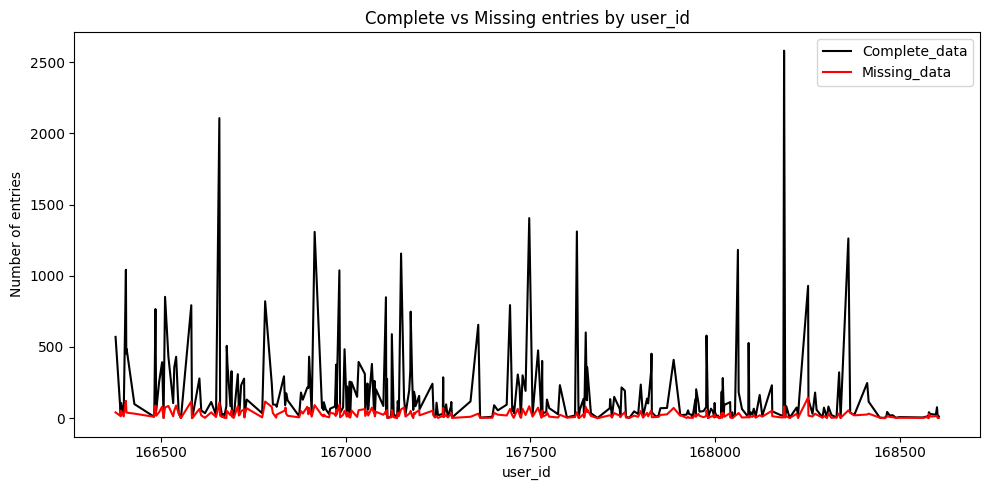

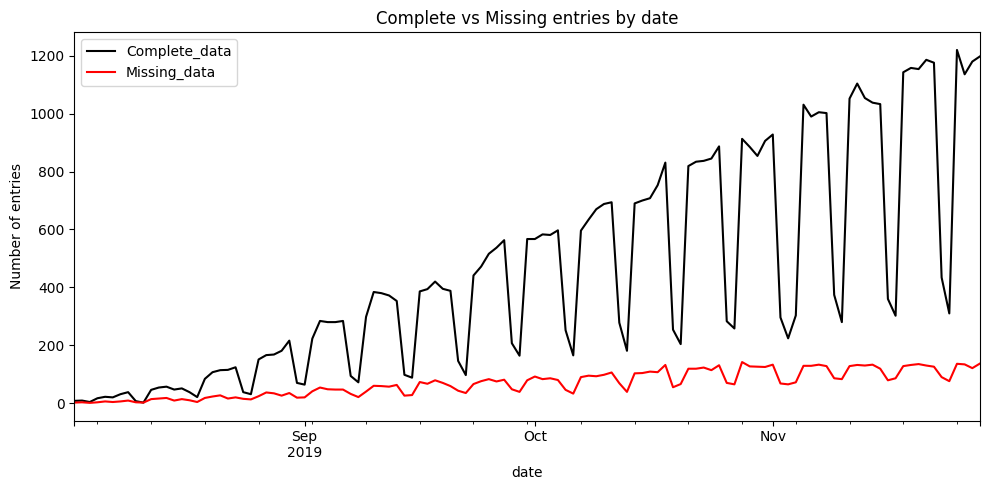

In [6]:
# We look for patterns to explore if the missing data is related to an specific date/user 
patterns = ['user_id', 'date']

for pattern in patterns:
    complete = df.groupby(pattern).size()
    empty = empty_cells.groupby(pattern).size()
    comparison = (pd.concat([complete, empty], axis=1).fillna(0))

    comparison.columns = ['Complete_data', 'Missing_data']
    comparison = comparison.sort_index()
    comparison.plot(kind='line', color=["black","red"],
        figsize=(10, 5),
        title=f'Complete vs Missing entries by {pattern}')

    plt.xlabel(pattern)
    plt.ylabel('Number of entries')
    plt.tight_layout()
    plt.show()



The scale makes the initial visualization difficult; however, several observations can still be made. Some clients have a higher number of entries than others. Additionally, the total number of entries increases over time. Although a higher number of missing entries is observed in November in contrast to september, this coincides with an overall increase in total entries. To clarify this pattern, the data is normalized using percentage rates, which are presented in the following graphs.

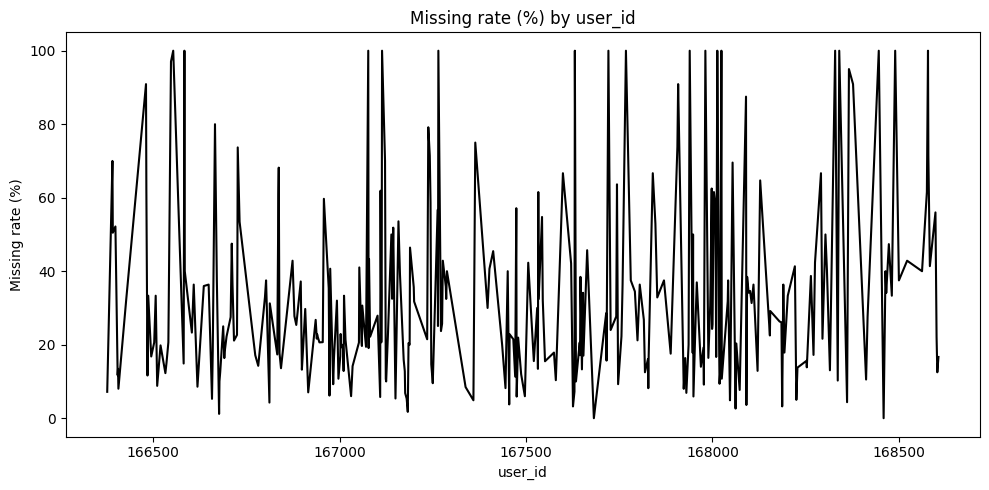

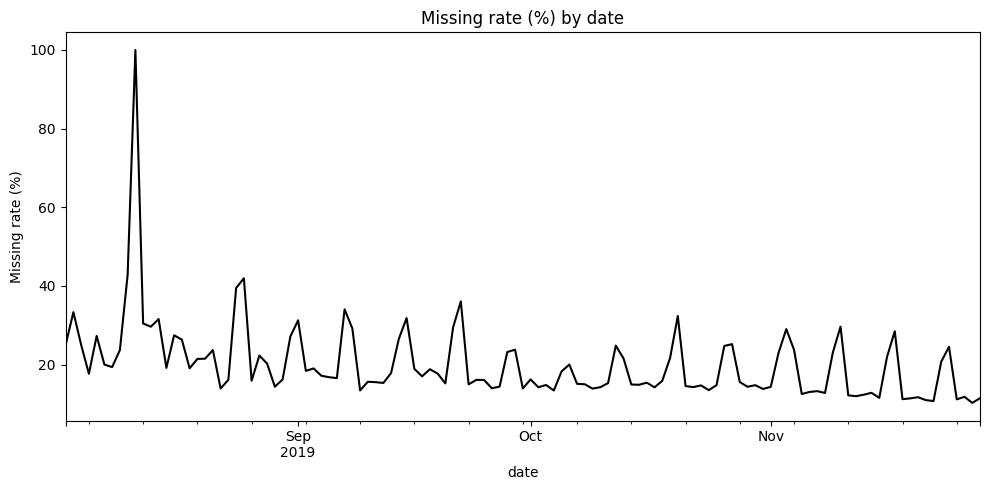

In [7]:
#Normalize the data to show a 0-100% scale on the missing rate cells

for pattern in patterns:
    complete = df.groupby(pattern).size()
    empty = empty_cells.groupby(pattern).size()
    comparison = (pd.concat([complete, empty], axis=1).fillna(0))
    comparison.columns = ['Complete_data', 'Missing_data']
    comparison['Missing_rate(%)'] = (comparison['Missing_data'] / comparison['Complete_data'] * 100)
    # Plotting
    comparison['Missing_rate(%)'].plot(figsize=(10, 5),color="black",
        title=f'Missing rate (%) by {pattern}')
    
    plt.xlabel(pattern)
    plt.ylabel('Missing rate (%)')
    plt.tight_layout()
    plt.show()

The user_id variable does not exhibit a clear pattern, indicating that missing data is not correlated with specific clients. In contrast, the date variable shows a cyclical behavior: there is repeated peaks over a cycle. To evaluate whether this pattern is associated with a specific day of the week, the data was grouped by weekday.

In [8]:
# Grouping by weekday
empty_cells = empty_cells.copy()   
empty_cells['weekday'] = empty_cells['date'].dt.day_name()
print("Missint values by weekday")

empty_weekday = empty_cells.groupby('weekday').size().sort_values()
empty_weekday.head(7)

Missint values by weekday


weekday
Sunday        676
Saturday      762
Monday       1276
Friday       1285
Thursday     1369
Wednesday    1401
Tuesday      1403
dtype: int64

In [9]:
# Grouping by weekday using relative values
comparison = comparison.copy()   
comparison.reset_index(inplace=True)
comparison['weekday'] = comparison['date'].dt.day_name()
print("Missing data rate by weekday")
empty_weekday_comparison = comparison.groupby('weekday').agg({'Complete_data':'sum', 'Missing_data':'sum'})
empty_weekday_comparison['Missing_Rate'] = 100 * empty_weekday_comparison['Missing_data'] / empty_weekday_comparison['Complete_data']
empty_weekday_comparison['Missing_Rate'] = empty_weekday_comparison['Missing_Rate'].round(2)
empty_weekday_comparison.head(7)

Missing data rate by weekday


,Complete_data,Missing_data,Missing_Rate
weekday,,,
Friday,9173,1285,14.01
Monday,8949,1276,14.26
Saturday,3238,762,23.53
Sunday,2467,676,27.40
Thursday,10158,1369,13.48
Tuesday,9932,1403,14.13
Wednesday,9985,1401,14.03


Text(0, 0.5, 'Number of entries')

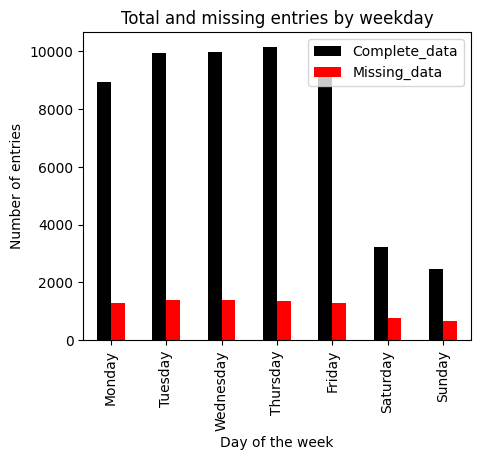

In [10]:
#Plotting by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
empty_weekday_comparison = empty_weekday_comparison.reindex(weekday_order)
empty_weekday_comparison[['Complete_data','Missing_data']].plot(kind='bar',
                   figsize=(5,4),
                   color=['black', 'red'],
                   title= 'Total and missing entries by weekday' )
plt.xlabel('Day of the week')
plt.ylabel('Number of entries')

Missing rates for each weekday (%)
weekday
Monday       14.26
Tuesday      14.13
Wednesday    14.03
Thursday     13.48
Friday       14.01
Saturday     23.53
Sunday       27.40
Name: Missing_Rate, dtype: float64


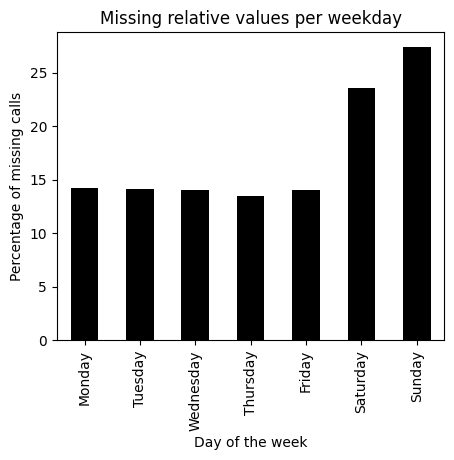

In [11]:
empty_weekday_comparison['Missing_Rate'].plot(kind='bar',
                   figsize=(5,4),
                   color='black',
                   title= 'Missing relative values per weekday' )
plt.xlabel('Day of the week')
plt.ylabel('Percentage of missing calls')
print("Missing rates for each weekday (%)")
print(empty_weekday_comparison['Missing_Rate'])

The number of missing entries is lower on weekends; however, the total call volume is also lower. On weekends, missing entries range from approximately 676 to 762, while this number nearly doubles on weekdays. Although call volume is higher on weekdays as well, the proportions differ: the total number of entries is at least three times higher on weekdays.

The final table and graph present the relative missing rate, showing that missing rates are higher on weekends. On weekdays, the missing rate is approximately 14%, increasing to around 23–27% on weekends.

In summary, within this dataset, missing entries cannot be attributed to a specific client or day, as most users and dates are affected. A clear pattern is observed on weekends, where the missing rate increases. Overall, missing values account for 15.16% of the dataset, which makes it acceptable to remove these records for the purposes of this analysis. To ensure this analysis can be reproduced periodically, it is recommended to identify and address the root cause of the missing data.

In [12]:
#Elimination of empty cells
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              45670 non-null  object                   
 1   date                 45670 non-null  datetime64[ns, UTC+03:00]
 2   direction            45670 non-null  object                   
 3   internal             45670 non-null  object                   
 4   operator_id          45670 non-null  Int64                    
 5   is_missed_call       45670 non-null  bool                     
 6   calls_count          45670 non-null  int64                    
 7   call_duration        45670 non-null  int64                    
 8   total_call_duration  45670 non-null  int64                    
dtypes: Int64(1), bool(1), datetime64[ns, UTC+03:00](1), int64(3), object(3)
memory usage: 3.2+ MB


*C) Eliminating duplicates* <br>
Finally, the removal od duplicates will be applied to the dataset. 


In [13]:
# Verifying the duplicated rows
print()
duplicates = df.duplicated().sum()
print("The duplicated cells in total are:", duplicates)
print("For example, operator '88002' has duplicated values for 2019-08-05 as it is shown:")
print()
user_880020= df[(df['operator_id']==880020) & (df['date']== '2019-08-05 00:00:00+03:00')]
user_880020.head(5)



The duplicated cells in total are: 4179
For example, operator '88002' has duplicated values for 2019-08-05 as it is shown:



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50


In [14]:
# Eliminate duplicated rows from the dataset
df = df.drop_duplicates()
df.info()
# Verify duplicated rows
duplicates = df.duplicated().sum()
print("The total number of duplicated rows is:", duplicates)
print()
print()
# Dataset reduction
original_df_length = len(original_df)
clean_df_length = len(df)
reduction_rate = 100 * (original_df_length - clean_df_length) / original_df_length

print(f"The clean dataset contains {clean_df_length} entries.")
print(f"The original dataset was reduced by {reduction_rate:.2f}% during the cleaning process.")


<class 'pandas.core.frame.DataFrame'>
Index: 41491 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              41491 non-null  object                   
 1   date                 41491 non-null  datetime64[ns, UTC+03:00]
 2   direction            41491 non-null  object                   
 3   internal             41491 non-null  object                   
 4   operator_id          41491 non-null  Int64                    
 5   is_missed_call       41491 non-null  bool                     
 6   calls_count          41491 non-null  int64                    
 7   call_duration        41491 non-null  int64                    
 8   total_call_duration  41491 non-null  int64                    
dtypes: Int64(1), bool(1), datetime64[ns, UTC+03:00](1), int64(3), object(3)
memory usage: 2.9+ MB
The total number of duplicated rows is: 0


The cl

In summary, the original dataframe had 53902 entries. A total of 8232 cells were removed because they contained empty cells, an a total of 4179 were removed because they had duplicated cells. <br>
**The clean dataset has 41491 entries, which will be explored in the next section.**

<br>
<br>

**3. EXPLORATORY DATA ANALYSIS**<br>
First, the data will be explored to examine the distribution of the variables and to determine whether the data follow a normal distribution or require preprocessing before further analysis. To achieve this, basic descriptive statistics and exploratory visualizations will be generated.
<br>
Second, the dataset will be presented in graphics to analyze the calls behaviour. 
<br>
Third, the dataset will be segmented by clients to determine if the client directly impacts the operator performance. 

<br>

*A) Data statistical distribution* <br>


In [15]:
# First, we create a new metric to measure de waiting time
df['waiting_duration'] = df['total_call_duration'] - df['call_duration']

# Basic descriptive statistics
print('Basic descriptive statistics for cuantitative metrics')
df.describe()

Basic descriptive statistics for cuantitative metrics


,operator_id,calls_count,call_duration,total_call_duration,waiting_duration
count,41491.0,41491.000000,41491.000000,41491.000000,41491.000000
mean,916516.771155,16.921381,1010.940011,1323.153238,312.213227
std,21234.081589,59.786187,4066.666485,4788.953155,1176.102940
min,879896.0,1.000000,0.000000,0.000000,0.000000
25%,900790.0,1.000000,0.000000,67.000000,19.000000
50%,913938.0,4.000000,106.000000,289.000000,60.000000
75%,937708.0,14.000000,772.000000,1107.000000,219.000000
max,973286.0,4817.000000,144395.000000,166155.000000,46474.000000


In [16]:
variables = ['date', 'calls_count', 'call_duration', 'waiting_duration']
for variable in variables: 
    df_min = df[variable].min()
    df_max = df[variable].max()
    df_range = df_max -  df_min
    df_mean = df[variable].mean()
    df_median = df[variable].median()

    print (f'The minimum {variable} recorded in the dataset is {df_min}')
    print (f'The maximum {variable} recorded in the dataset is {df_max}')
    print (f'The {variable} range recorded in the dataset is {df_range}')
    print (f'The {variable} mean recorded in the dataset is {df_mean}')
    print (f'The {variable} median recorded in the dataset is {df_median}')
    print ()

The minimum date recorded in the dataset is 2019-08-02 00:00:00+03:00
The maximum date recorded in the dataset is 2019-11-28 00:00:00+03:00
The date range recorded in the dataset is 118 days 00:00:00
The date mean recorded in the dataset is 2019-10-23 15:58:20.739919360+03:00
The date median recorded in the dataset is 2019-10-28 00:00:00+03:00

The minimum calls_count recorded in the dataset is 1
The maximum calls_count recorded in the dataset is 4817
The calls_count range recorded in the dataset is 4816
The calls_count mean recorded in the dataset is 16.92138054035815
The calls_count median recorded in the dataset is 4.0

The minimum call_duration recorded in the dataset is 0
The maximum call_duration recorded in the dataset is 144395
The call_duration range recorded in the dataset is 144395
The call_duration mean recorded in the dataset is 1010.9400110867417
The call_duration median recorded in the dataset is 106.0

The minimum waiting_duration recorded in the dataset is 0
The maximu

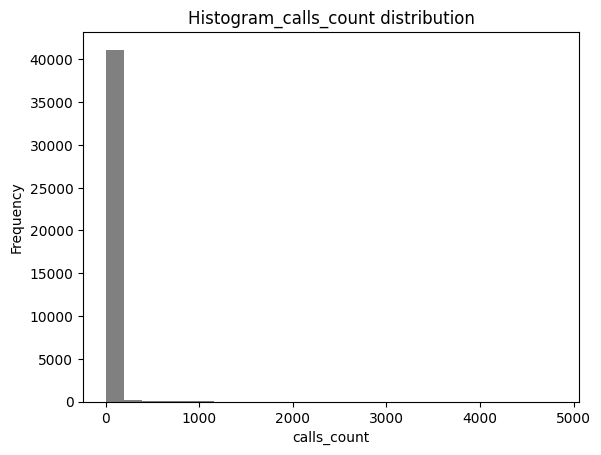

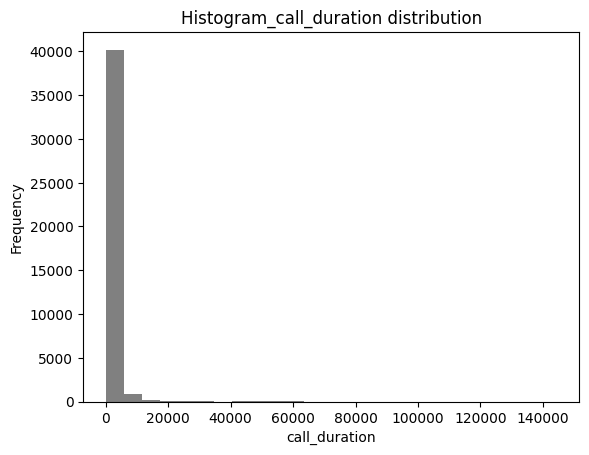

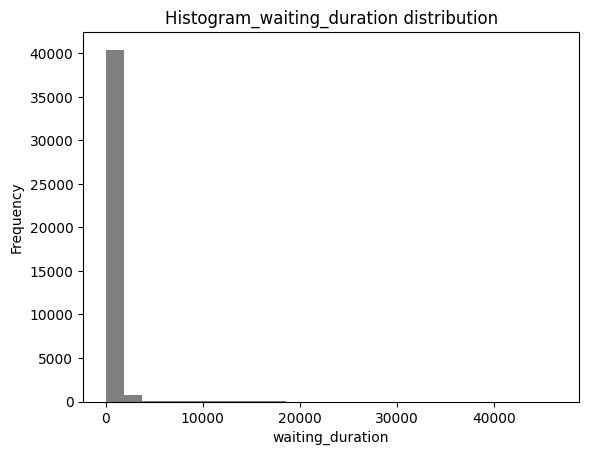

In [17]:
# We graph our variables in a logarithm scale to vizualize the data distribution
variables = ['calls_count', 'call_duration', 'waiting_duration']

for variable in variables:
    df[variable].plot(kind='hist',bins=25,
        title=f"Histogram_{variable} distribution",
        xlabel=variable,
        color = "grey")
    plt.show()



HIGHLIGHTS: <br> <br>
The dataset contains records collected between 2019-08-02 and 2019-11-28 (118 days). <br>

Descriptive statistics show that the standard deviation is higher than the mean for several variables. This behavior is supported by the presence of extremely high maximum values compared to the corresponding mean and median, indicating highly right-skewed distributions. Therefore, we are trimming data to remove those extreme values from 'calls_count','call_duration' and 'total_call_duration'.

*B) TRIMMING: Winsorization method*

In [18]:
# Copy original dataframe
trimmed_df = df.copy()

# Numeric columns to trim
cols_to_trim = ['calls_count','call_duration','total_call_duration']

# Apply P99 upper bound trimming
for col in cols_to_trim:
    upper = trimmed_df[col].quantile(0.99)
    trimmed_df = trimmed_df[trimmed_df[col] <= upper]

# Report trimming impact
print(f"Original rows: {df.shape[0]}")
print(f"Trimmed rows: {trimmed_df.shape[0]}")
print(f"Rows removed: {df.shape[0] - trimmed_df.shape[0]}")
# Percentage of remoeed data
preserved_pct = 100 * trimmed_df.shape[0] / df.shape[0]
print(f"Preserved data: {preserved_pct:.2f}%")

# Descriptive statistics of trimmed data
trimmed_df.describe()


Original rows: 41491
Trimmed rows: 40258
Rows removed: 1233
Preserved data: 97.03%


,operator_id,calls_count,call_duration,total_call_duration,waiting_duration
count,40258.0,40258.000000,40258.000000,40258.000000,40258.000000
mean,916386.544488,11.138656,613.732997,811.683144,197.950147
std,21142.150396,18.217266,1118.590557,1264.939309,389.276490
min,879896.0,1.000000,0.000000,0.000000,0.000000
25%,900790.0,1.000000,0.000000,64.000000,18.000000
50%,913788.0,4.000000,96.000000,267.000000,56.000000
75%,937604.0,12.000000,678.000000,974.000000,194.000000
max,973286.0,164.000000,7533.000000,7655.000000,5621.000000


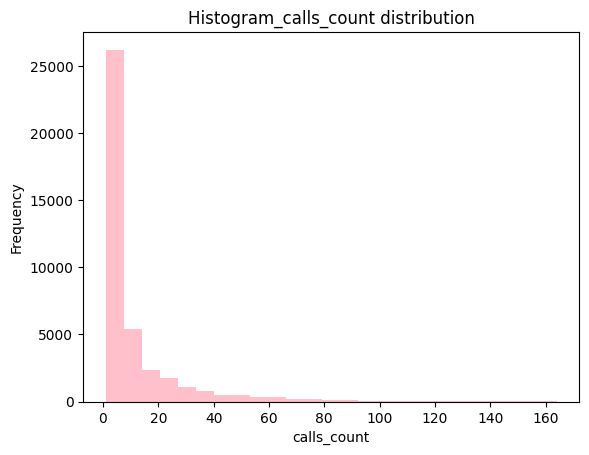

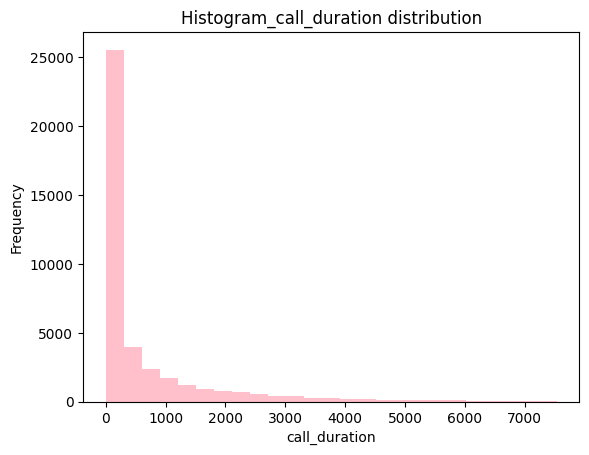

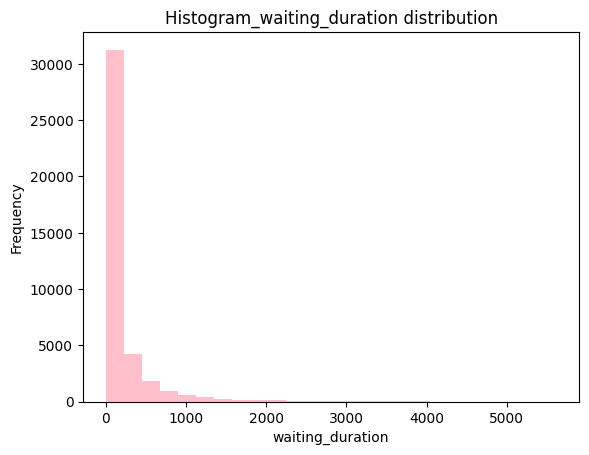

In [19]:
# We graph our variables againt to vizualize the data distribution
variables = ['calls_count', 'call_duration', 'waiting_duration']

for variable in variables:
    trimmed_df[variable].plot(kind='hist',bins=25,
        title=f"Histogram_{variable} distribution",
        xlabel=variable,
        color = "pink")
    plt.show()

In [20]:
# We create grouped dataframes for each categorical variable: direction, internal, is_missed_calls
df_direction = trimmed_df.groupby('direction').agg(
    total_calls=('calls_count', 'sum'),
    total_duration_in_call=('call_duration','sum'),
    total_waiting_duration=('waiting_duration', 'sum'))
df_direction['duration_per_call'] = (df_direction['total_duration_in_call'] / df_direction['total_calls']).round(2)
df_direction['waiting_duration_per_call'] = (df_direction['total_waiting_duration'] / df_direction['total_calls']).round(2)

# Direction calls
percentages = 100 * df_direction['total_calls'] / df_direction['total_calls'].sum()

print("____Call direction___")
print(f'In the database, there is a record of {percentages.loc["in"].round(2)}% incoming calls and {percentages.loc["out"].round(2)}% outbound calls')
df_direction.head()


____Call direction___
In the database, there is a record of 17.96% incoming calls and 82.04% outbound calls


,total_calls,total_duration_in_call,total_waiting_duration,duration_per_call,waiting_duration_per_call
direction,,,,,
in,80535,8198544,1131314,101.80,14.05
out,367885,16509119,6837763,44.88,18.59


In [21]:
df_internal = trimmed_df.groupby('internal').agg(
    total_calls=('calls_count', 'sum'),
    total_duration_in_call=('call_duration', 'sum'),
    total_waiting_duration=('waiting_duration', 'sum'))
df_internal['duration_per_call'] = (df_internal['total_duration_in_call'] / df_internal['total_calls']).round(2)
df_internal['waiting_duration_per_call'] = (df_internal['total_waiting_duration'] / df_internal['total_calls']).round(2)

print("____Internal calls___")
# Internal calls
percentages = 100 * df_internal['total_calls'] / df_internal['total_calls'].sum()
print(f'There is {percentages.loc[False].round(2)}% external calls and {percentages.loc[True].round(2)}% internal calls')
df_internal.head()

____Internal calls___
There is 96.95% external calls and 3.05% internal calls


,total_calls,total_duration_in_call,total_waiting_duration,duration_per_call,waiting_duration_per_call
internal,,,,,
False,434755,24125870,7857260,55.49,18.07
True,13665,581793,111817,42.58,8.18


In [22]:

df_missed = trimmed_df.groupby('is_missed_call').agg(
    total_calls=('calls_count', 'sum'),
    total_duration_in_call=('call_duration', 'sum'),
    total_waiting_duration=('waiting_duration', 'sum'))
df_missed['duration_per_call'] = (df_missed['total_duration_in_call'] / df_missed['total_calls']).round(2)
df_missed['waiting_duration_per_call'] = (df_missed['total_waiting_duration'] / df_missed['total_calls']).round(2)

print("____Missed calls___")
# Missed calls
percentages = 100 * df_missed['total_calls'] / df_missed['total_calls'].sum()
print(f'There is {percentages.loc[False].round(2)}% received calls and {percentages.loc[True].round(2)}% missed calls')
df_missed.head()

____Missed calls___
There is 58.75% received calls and 41.25% missed calls


,total_calls,total_duration_in_call,total_waiting_duration,duration_per_call,waiting_duration_per_call
is_missed_call,,,,,
False,263458,24683987,3784340,93.69,14.36
True,184962,23676,4184737,0.13,22.62


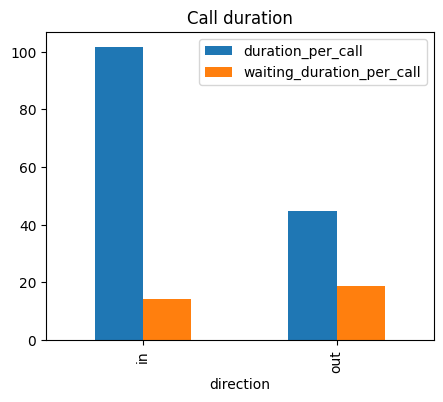

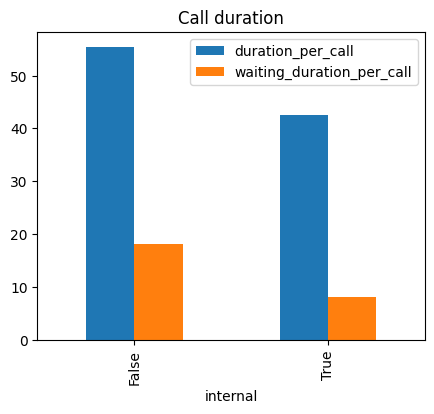

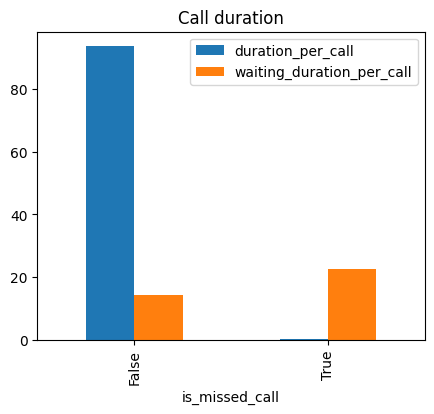

In [23]:
df_direction.head()
def graph(df):
    df.head()
    # Plot
    df[['duration_per_call','waiting_duration_per_call']].plot(
        kind='bar',
        title=f'Call duration',
        figsize=(5, 4))
    plt.show()

graph(df_direction)
graph(df_internal)
graph(df_missed)

In [24]:
trimmed_df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26


In [25]:
# Remarkable insights
print("Insights:")
print(f'The maximum number of calls recorded per agent per day in the trimmed dataset is {(trimmed_df['calls_count'].max())}.')
print(f'The maximum number of calls recorded per agent per day in the non-trimmed dataset is {(df['calls_count'].max())}.')
print()
print(f'The longest call recorded in the trimmed dataset is {((trimmed_df['call_duration'].max())/3600).round(2)} hours.')
print(f'The longest call recorded in the non-trimmed dataset dataset is {((df['call_duration'].max())/3600).round(2)} hours.')
print()
print(f'The longest waiting time recorded in the trimmed dataset is {((trimmed_df['waiting_duration'].max())/3600).round(2)} hours.')
print(f'The longest waiting time  recorded in the non-trimmed dataset is {((df['waiting_duration'].max())/3600).round(2)} hours.')



Insights:
The maximum number of calls recorded per agent per day in the trimmed dataset is 164.
The maximum number of calls recorded per agent per day in the non-trimmed dataset is 4817.

The longest call recorded in the trimmed dataset is 2.09 hours.
The longest call recorded in the non-trimmed dataset dataset is 40.11 hours.

The longest waiting time recorded in the trimmed dataset is 1.56 hours.
The longest waiting time  recorded in the non-trimmed dataset is 12.91 hours.


In [26]:
# We apply a second filter to consider only the calls with a total call duration (considering call and waiting time) over 10 seconds. 
trimmed_df.head(2)
valuable_calls_df = trimmed_df[trimmed_df['call_duration']>10]

trimmed_df_size = trimmed_df.shape[0]
valuable_calls_df_size = valuable_calls_df.shape[0]
valuable_call_rate = 100* valuable_calls_df_size / trimmed_df_size


print (f"The trimmed dataframe has {trimmed_df_size} call records.")
print (f"Only {valuable_calls_df_size} last more than 10 seconds after being answered.") 
print (f"In other words, only {valuable_call_rate:.2f}% of the calls last more than 10 seconds.")
print (f"For calls lasting more than 10 seconds, the most common call duration is {valuable_calls_df['call_duration'].mode().iloc[0]} seconds.")


The trimmed dataframe has 40258 call records.
Only 25578 last more than 10 seconds after being answered.
In other words, only 63.54% of the calls last more than 10 seconds.
For calls lasting more than 10 seconds, the most common call duration is 13 seconds.



*RESULTS* <br>
The insights and graphs sustain the trimming methodology applied to the dataset. As a result, the trimmed dataset will be used for the agent's performance evaluation. <br>
There is 8198544 incoming calls (17.96%) and 16509119 outcoming calls (82.04%). In overall, the operators spend more time on outbound calls than inbound calls. The total duration in calls is around 2 times higher for outbound calls than income calls. <br>
96.95% are calls with external sources.  <br>
There is 58.75% received calls and 41.25% missed calls. The missed calls have an average record of 23 seconds on waiting time, which is higher than the 14.36 seconds recorded for non-missed calls. In average, an operataror lasts 93.69 seconds on a call and the waiting time is 14.36 seconds. <br>
Only 63.54% of the calls last more than 10 seconds. 


<br>

**4. METRIC CONSTRUCTION**  <br>
Using the trimmed dataset, Key Performance Indicators (KPIs) will be constructed. Based on standard teleperformance KPIs, a dataset containing these indicators will be built. The selected metrics are:<br>
1. Total calls <br>
2. Average Handle Time (AHT) <br>
3. Average Waiting Time (AWT) <br>
4. Abandon Rate (AR) <br>

In [27]:
trimmed_df.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1


In [28]:
# creating a filtered database based on operator behaviour
variables = ['calls_count', 'call_duration', 'waiting_duration']

operator_df = trimmed_df.groupby('operator_id').agg(
    total_calls = ('calls_count','sum'),
    total_call_duration = ('call_duration','sum'),
    total_waiting_duration = ('waiting_duration','sum'),
    median_calls = ('calls_count','median'),
    median_call_duration = ('call_duration','median'),
    median_waiting_duration = ('waiting_duration','median'))
    
# Visualize operator dataframe 
operator_df = operator_df.sort_values('total_calls',ascending=True)
operator_df.head(3)

,total_calls,total_call_duration,total_waiting_duration,median_calls,median_call_duration,median_waiting_duration
operator_id,,,,,,
969262,1,0,17,1.0,0.0,17.0
969284,1,0,4,1.0,0.0,4.0
890234,1,85,12,1.0,85.0,12.0


In [29]:
# Metric construction
#Average Handle Time (AHT)
operator_df['AHT'] = operator_df['total_call_duration'] / operator_df['total_calls']

#Average Waiting Time (AWT)
operator_df['AWT'] = operator_df['total_waiting_duration'] / operator_df['total_calls']


In [30]:
#Abandon Rate (AR)

#We create the needed values in a diferent dataframe 
abandon_df = trimmed_df.groupby(['operator_id','is_missed_call']).agg({'calls_count':'sum'}).reset_index()
pivot_abandon_df = abandon_df.pivot(
    index= 'operator_id',
    columns = 'is_missed_call',
    values = 'calls_count').reset_index()
pivot_abandon_df = pivot_abandon_df.fillna(0)

pivot_abandon_df.columns = ['operator_id', 'taken_calls', 'missed_calls']
pivot_abandon_df['total_count'] = pivot_abandon_df['taken_calls'] + pivot_abandon_df['missed_calls']
pivot_abandon_df['AR'] = (pivot_abandon_df['missed_calls'] / pivot_abandon_df['total_count']).round(2)
pivot_abandon_df = pivot_abandon_df.sort_values('total_count',ascending=True)

# Visualization
pivot_abandon_df.head()

,operator_id,taken_calls,missed_calls,total_count,AR
1064,969262,0.0,1.0,1.0,1.0
1067,969284,0.0,1.0,1.0,1.0
55,890234,1.0,0.0,1.0,0.0
16,883898,1.0,0.0,1.0,0.0
1042,963716,1.0,0.0,1.0,0.0


In [31]:
# We merge the values to the operator dataframe
operator_df = operator_df.merge(pivot_abandon_df, on='operator_id')

# Reorganize the columns
operator_df.copy()
operator_df = operator_df [['operator_id', 'total_calls','taken_calls', 'missed_calls','median_calls', 
                            'total_call_duration', 'total_waiting_duration', 'median_call_duration', 'median_waiting_duration', 
                            'AHT', 'AWT', 'AR']]
#Correct the cell format 
int_variables = [ 'total_calls','taken_calls', 'missed_calls','median_calls', 
                            'total_call_duration', 'total_waiting_duration', 'median_call_duration', 'median_waiting_duration']

for variable in int_variables:
    operator_df[variable] = (pd.to_numeric(operator_df[variable], errors='coerce').fillna(0).astype(int))

# Visualize dataframe
operator_df.head(10)

,operator_id,total_calls,taken_calls,missed_calls,median_calls,total_call_duration,total_waiting_duration,median_call_duration,median_waiting_duration,AHT,AWT,AR
0,969262,1,0,1,1,0,17,0,17,0.0,17.0,1.0
1,969284,1,0,1,1,0,4,0,4,0.0,4.0,1.0
2,890234,1,1,0,1,85,12,85,12,85.0,12.0,0.0
3,883898,1,1,0,1,70,10,70,10,70.0,10.0,0.0
4,963716,1,1,0,1,25,14,25,14,25.0,14.0,0.0
5,960666,1,1,0,1,125,3,125,3,125.0,3.0,0.0
6,891192,1,1,0,1,1306,32,1306,32,1306.0,32.0,0.0
7,884294,1,1,0,1,5,6,5,6,5.0,6.0,0.0
8,891254,1,1,0,1,79,26,79,26,79.0,26.0,0.0
9,923646,1,1,0,1,14,19,14,19,14.0,19.0,0.0


The operator_df dataframe summarizes the performance of all agents. This dataframe will be exported as an Excel report and saved as the "agents_performance" file.

In [32]:
#Export agent´s metric as an Excel report
operator_df.to_excel("agents_performance.xlsx", index=False)

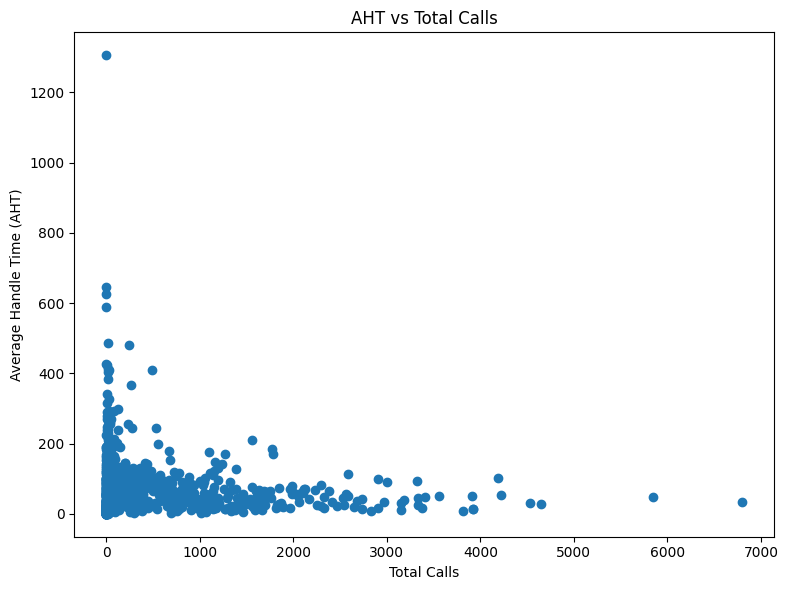

In [33]:
#Agents performance´s graphics
plt.figure(figsize=(8, 6))
plt.scatter(operator_df['total_calls'], operator_df['AHT'])

plt.xlabel('Total Calls')
plt.ylabel('Average Handle Time (AHT)')
plt.title('AHT vs Total Calls')

plt.tight_layout()
plt.show()


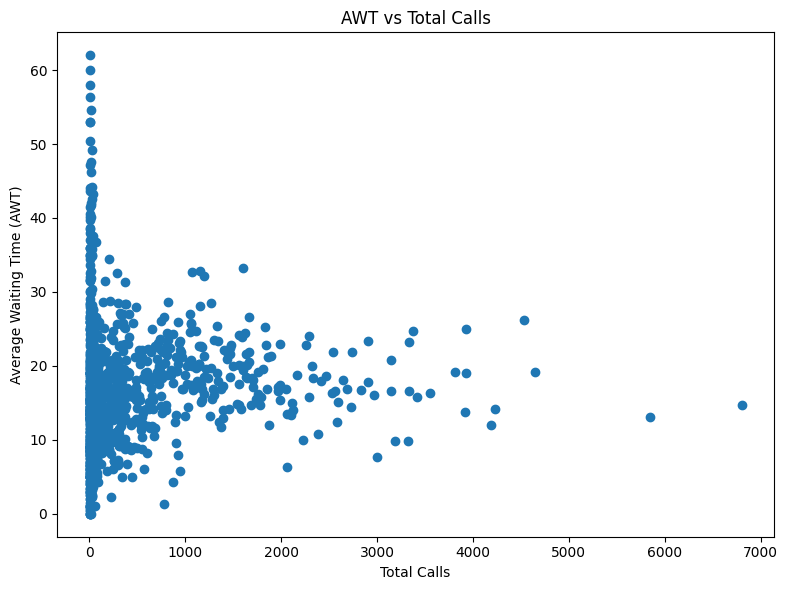

In [50]:
#Agents performance´s graphics
plt.figure(figsize=(8, 6))
plt.scatter(operator_df['total_calls'], operator_df['AWT'])

plt.xlabel('Total Calls')
plt.ylabel('Average Waiting Time (AWT)')
plt.title('AWT vs Total Calls')

plt.tight_layout()
plt.show()

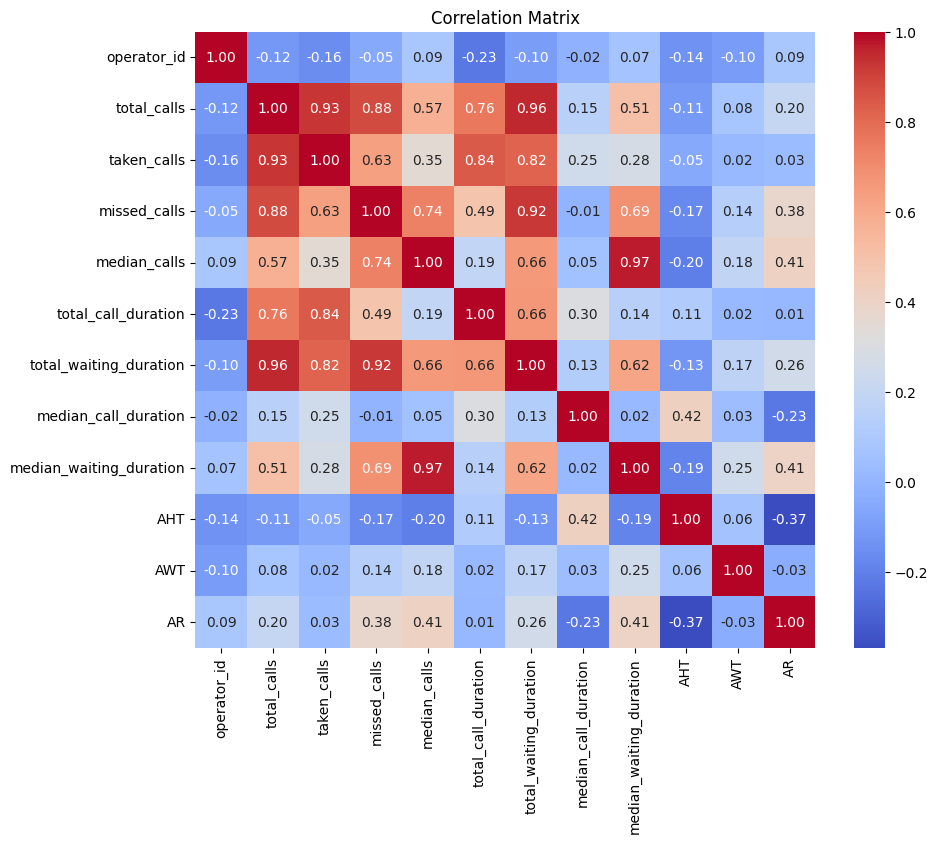

In [35]:

plt.figure(figsize=(10, 8))
sns.heatmap(operator_df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


To conclude, we created a dataframe using the estimated performance metrics. Agent performance is evaluated using AHT, AWT, and AR, where lower values indicate better performance, while higher values reflect poorer performance. Because this metrics are independent variables, they will be standarized to be summed and create a performance index. The proposed formula is: <br>
&emsp;*Performance Index=-(zAHT+zAWT+zAR)*<br>
where <br>
*zAHT = standarized Average Handle Time <br>
zAWT = standarized Average Handling Time <br>
zAR = standarized Abandon Rate* <br><br>
High performance index values indicate best performance while lowest values indicates poor performance. 
 

In [42]:
#We extract the metrics to a new dataframe
operator_performance_df = operator_df[['operator_id','total_calls','AHT', 'AWT', 'AR']].copy()
operator_performance_df['operator_id'] = operator_performance_df['operator_id'].astype(str)
operator_performance_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   operator_id  1092 non-null   object 
 1   total_calls  1092 non-null   int64  
 2   AHT          1092 non-null   float64
 3   AWT          1092 non-null   float64
 4   AR           1092 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 42.8+ KB


In [46]:
# We standarize the values
scaler = StandardScaler()
metrics = ['AHT', 'AWT', 'AR']

st_operator_performance_df = operator_performance_df.copy()
st_operator_performance_df[[f'z{m}' for m in metrics]] = scaler.fit_transform(operator_performance_df[metrics])
st_operator_performance_df['performance_index'] = - (st_operator_performance_df['zAHT'] + st_operator_performance_df['zAWT']+ st_operator_performance_df['zAR'])
st_operator_performance_df = st_operator_performance_df.sort_values('performance_index').reset_index()

# Round values 
st_operator_performance_df[['AHT', 'AWT', 'AR', 'performance_index']] = st_operator_performance_df[['AHT', 'AWT', 'AR', 'performance_index']].round(2)

# Present the results
print("10 Best performance agents:")
st_operator_performance_df = st_operator_performance_df.sort_values("performance_index",ascending=False)
st_operator_performance_df.head(10)


10 Best performance agents:


,index,operator_id,total_calls,AHT,AWT,AR,zAHT,zAWT,zAR,performance_index
1091,170,968520,5,6.60,1.00,0.0,-0.819697,-1.880576,-1.1537,3.85
1090,102,952954,2,7.50,1.00,0.0,-0.808244,-1.880576,-1.1537,3.84
1089,214,930692,6,9.67,0.83,0.0,-0.780670,-1.900690,-1.1537,3.84
1088,448,954086,32,9.91,2.25,0.0,-0.777621,-1.729719,-1.1537,3.66
1087,26,946020,1,5.00,3.00,0.0,-0.840059,-1.639205,-1.1537,3.63
1086,339,896020,16,29.50,0.94,0.0,-0.528270,-1.888119,-1.1537,3.57
1085,133,952968,3,10.00,4.33,0.0,-0.776428,-1.478291,-1.1537,3.41
1084,239,952982,8,48.88,0.88,0.0,-0.281703,-1.895662,-1.1537,3.33
1083,13,891948,1,33.00,3.00,0.0,-0.483729,-1.639205,-1.1537,3.28
1082,7,884294,1,5.00,6.00,0.0,-0.840059,-1.277148,-1.1537,3.27


In [47]:
# Present the results
print("10 Lowest performance agents:")
st_operator_performance_df = st_operator_performance_df.sort_values("performance_index",ascending=True)
st_operator_performance_df.head(10)


10 Lowest performance agents:


,index,operator_id,total_calls,AHT,AWT,AR,zAHT,zAWT,zAR,performance_index
0,6,891192,1,1306.00,32.00,0.00,15.716556,1.860675,-1.153700,-16.42
1,35,932246,1,0.00,60.00,1.00,-0.903689,5.239870,2.544643,-6.88
2,66,899898,2,590.00,25.00,0.00,6.604691,1.015877,-1.153700,-6.47
3,40,899906,1,626.00,19.00,0.00,7.062830,0.291763,-1.153700,-6.20
4,22,917890,1,647.00,13.00,0.00,7.330077,-0.432350,-1.153700,-5.74
5,65,899900,2,191.00,58.00,0.00,1.526990,4.998499,-1.153700,-5.37
6,188,956080,5,237.40,50.40,0.00,2.117479,4.081289,-1.153700,-5.05
7,316,909768,14,278.64,42.00,0.00,2.642339,3.067530,-1.153700,-4.56
8,830,891154,487,408.52,18.16,0.32,4.295210,0.190160,0.029770,-4.52
9,712,918390,246,479.75,15.65,0.13,5.201616,-0.112484,-0.672916,-4.42


**CONCLUSION**

The original dataset contained 53,902 entries. A total of 8,232 rows with missing values in the "operator_id" and "internal" columns were removed, and an additional 4,179 rows were removed due to duplicated records. <br>

The missing entries were analyzed to determine whether the missing data was associated with a specific date or client; however, no specific pattern was identified. Weekends exhibited the highest missing-value rates. <br>

Overall, the missing entries represented 15.16% of the total dataset and were removed from the analysis. After the data-cleaning process, the dataset was reduced by 23.03%, resulting in a final dataset of 41,491 entries.<br>

The dataset presents the records obtained from 2019-08-02 to 2019-11-28 (118 days). <br>

The clean dataset was trimmed as inconsistent extreme values were detected.  <br>

There is 8198544 incoming calls (17.96%) and 16509119 outcoming calls (82.04%). In overall, the operators spend more time on outbound calls than inbound calls. <br>

There is 58.75% received calls and 41.25% missed calls. The missed calls has an average record of 23 seconds on waiting time, which is higher than the 14.36 seconds recorded for non-missed calls. <br>
Only 63.54% of the calls last more than 10 seconds, contributing to the observed call duration distribution (right-skewed). <br>